## Twilight's Grimoire

### Import Text Adventures

In [18]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [19]:
spawn_spot = things.Location(
    "Spawn Spot",
    "In the heart of a moonlit, eerie forest, an ancient house looms. Its timeworn walls, veiled in ivy and mystery, stand as silent witnesses to countless untold stories. This is where your journey in the shadows begins."
)

west_graveyard = things.Location(
    "West Graveyard",
    "Under a gnarled, old tree in the graveyard's western reaches, a mysterious 'X' marks a spot on the earth, suggesting secrets buried deep. Moonlight falling on the tree casts eerie and unsettling shadows."
)

east_graveyard = things.Location(
    "East Graveyard",
    "A dense fog envelops the eastern graveyard, where rows of ancient graves lie in solemn silence. A strange, shining red light glimmers in the distance, piercing the mist and beckoning with an unsettling allure ..."
)

main_chamber = things.Location(
    "Main Chamber",
    "As you pass through huge teak doors that opened with a deafening creak, you enter a grand chamber that houses a dormant portal. Its frame, intricately carved with unknown runes, awaits the activation by the mystical green and blue orbs. Flanking the portal, doors lead east and west, each whispering secrets of the arcane, while the air itself seems charged with the anticipation of reawakened magic."
)

blue_room = things.Location(
    "Blue Room",
    "Circular and ethereal, this room is bathed in a ghostly blue hue. A spectral figure glides silently, its presence both haunting and sorrowful. You sense it has something you want ..."
)

green_room = things.Location(
    "Green Room",
    "Shrouded in darkness, this circular chamber holds a majestic hearth at its far end. Its cold, dark stones seem to hunger for a fire long extinguished."
)

treasure_chamber = things.Location(
    "Treasure Chamber",
    "In the treasure room, amongst the myriad of glittering artifacts, a singular, ancient tome catches your eye. Its cover, adorned with your family's crest, pulses with a familiar magic. This book, filled with forgotten spells and the history of your lineage, is the key to unlocking your true potential and fulfilling your destiny as the heir of a powerful wizard."
)

#connections
spawn_spot.add_connection("west", west_graveyard)
spawn_spot.add_connection("east", east_graveyard)
spawn_spot.add_connection("in", main_chamber)
main_chamber.add_connection("east", green_room)
main_chamber.add_connection("west", blue_room)
main_chamber.add_connection("in", treasure_chamber)

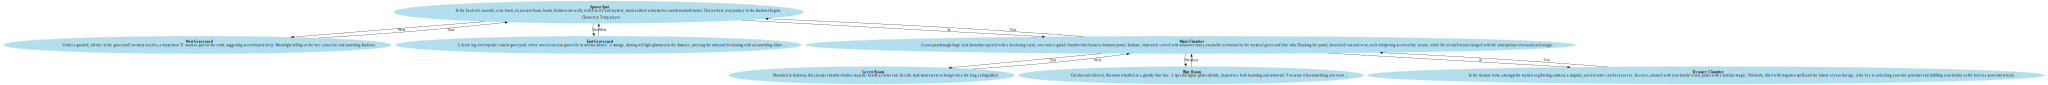

In [20]:
tempgame = games.Game(spawn_spot, things.Character(name="Temp Player", description="", persona=""))

from text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

## Items

### Gettable Items

In [ ]:
bag_of_salt = things.Item(
    "salt bag",
    "A bag of enchnated salt",
    "This small burlap pouch contains salt glowing with a faint, ethereal light. Imbued with ancient magic, it has the power to disrupt and banish spectral entities. Essential for navigating haunted spaces, the salt's mystical potency is palpable to the touch."
)
bag_of_salt.set_property("is_weapon", True)
bag_of_salt.set_property("is_fragile", True)

ember_berry = things.Item(
    "ember berry",
    "Glowing red, warm, flame-shaped berry."
    "A rare, luminescent berry that glows with an inner fire. It's said to be born from the heart of ancient flames."
)

fire_spirit = things.Item(
    "fire spirit",
    "A red-orange glowing fire spirit",
    "You see a small fire spirit flickering with a hungry glow. Its red light dances through the fog, casting playful yet forlorn shadows."
)
fire_spirit.set_property("is_hungry", True)
fire_spirit.set_property("is_friendly", False)
fire_spirit.set_property("gettable", False)
fire_spirit.add_command_hint("Feed it or pet it. Be careful what you choose !")
east_graveyard.add_item(fire_spirit)

green_orb = things.Item(
    "green orb",
    "A smooth glowing emerald orb",
    "This orb pulsates with a deep, verdant light, resembling a small, encapsulated forest."
)

blue_orb = things.Item(
    "blue orb",
    "A glass-like blue orb",
    "Radiating a serene azure glow, this orb appears to hold a miniature storm, complete with tiny lightning strikes"
)

tome = things.Item(
    "ancient tome",
    "A rustic family crested book",
    "It is your family's long lost treasured book of arcane knowledge"
)
treasure_chamber.add_item(tome)

### Scenery Items

In [ ]:
portal = things.Item(
    "portal",
    "a portal",
    "This large, archaic portal stands silent and still."
)
portal.set_property("gettable", False)
portal.set_property("is_dormant", True)
portal.add_command_hint("energize portal by placing the orbs")
main_chamber.add_item(portal)

hearth = things.Item(
    "hearth",
    "a hearth",
    "Ancient, dark stone hearth, eerily cold."
)
hearth.set_property("gettable", False)
hearth.set_property("is_lit",False)
hearth.add_command_hint("light it by releasing the spirit")
green_room.add_item(hearth)

## Characters

### Player

In [ ]:
player = things.Character(
    name="Arcane Heir",
    description="You should meet the Arcane Heir, the last descendant of a legendary wizard. Despite their mystical heritage, there's a sense of searching and uncertainty about them. They might be the key to untold mysteries, and in their quest, you'll find not just magic, but a companion in adventure.",
    persona="I am the last of my line, carrying the weight of a legacy I barely understand. My life has been a quest to uncover the secrets of my ancestry and to harness the magic that flows in my veins. I've always felt out of place, caught between worlds - the mundane and the mystical. I long to unlock my true potential and understand my family's past. But this journey is not just about discovering power; it's about finding my place in a world where I've always felt like an outsider.",
)

spade = things.Item(
    "spade",
    "a rusty old spade"
    "A spade that is capable of digging up some earth"
)
player.add_to_inventory(spade)

### Non-Player Characters (NPCs)

In [ ]:
wraith = things.Character(
    name = "wraith",
    description= "Encounter the Whispering Wraith in the Blue Room, a ghostly figure bound by untold secrets. Mysterious and melancholic, this spirit may hold keys to hidden truths, if you dare to communicate.",
    persona = "I am a remnant of a forgotten past, lingering in the shadows of this room. My existence is tied to a secret I cannot escape. I yearn for someone to exorcise me, to understand the sorrow that binds me to this world."
)
blue_room.add_character(wraith)
wraith.add_to_inventory(blue_orb)

## Actions

In [ ]:
class Dig(actions.Action):
    ACTION_NAME = "dig earth"
    ACTION_DESCRIPTION = "Dig the earth marked by X under the tree"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        self.character: things.Character = self.parser.get_character(command)
        self.location = self.character.location
        self.spade: things.Item = self.parser.match_item("spade", self.parser.get_items_in_scope(self.character))

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must have spade in inventory 
        * The character must be in east graveyard
        """
        if self.spade == None:
            description = "You do not have a spade"
            self.parser.fail(description)
            return False
        elif not self.character.is_in_inventory(self.spade):
            description = "You do not have a spade in your inventory"
            self.parser.fail(description)
            return False
        elif not self.location == west_graveyard: 
            description = "You are in the wrong location. Cannot dig here !"
            self.parser.fail(description)
            return False
        return True
        
    def apply_effects(self):
        """
        Drops the salt bag and ember berry
        """
        self.location.add_item(bag_of_salt)
        self.location.add_item(ember_berry)
        description = "As you dig beneath the mysterious 'X' marked beneath the old tree, your efforts uncover a hidden trove. There lies a small glowing salt bag, radiating a subtle, magical aura. Beside it, nestled safely in the earth, is a single Ember Berry. Its fiery glow is a warm contrast to the chilling night air."
        self.parser.ok(description)

In [ ]:
class Feed(actions.Action):
    ACTION_NAME = "feed fire spirit"
    ACTION_DESCRIPTION = "Feed the ember berry to the fire spirit"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        self.character: things.Character = self.parser.get_character(command)
        self.fire_spirit : things.Item = self.parser.match_item(
            "fire spirit", self.parser.get_items_in_scope(self.character)
            )
        self.ember_berry : things.Item = self.parser.match_item(
            "ember berry", self.parser.get_items_in_scope(self.character)
            )

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in same location as fire spirit
        * The charcter must have ember berry in the inventory 
        * The spirit must be hungry
        """
        if self.ember_berry == None:
            description = "You do not have the ember berry"
            self.parser.fail(description)
            return False
        elif not self.character.is_in_inventory(self.ember_berry):
            description = "You do not have the ember berry in your inventory"
            self.parser.fail(description)
            return False
        elif self.fire_spirit == None:
            description = "The fire spirit is not at your location"
            self.parser.fail(description)
            return False
        elif not self.fire_spirit.location.here(self.character):
            description = "The fire spirit is not at your location"
            self.parser.fail(description)
            return False
        elif not self.fire_spirit.get_property("is_hungry"):
            description = "The fire spirit is not hungry"
            self.parser.fail(description)
            return False
        return True
        
    def apply_effects(self):
        """
        The fire spirit is not hungry anymore
        """
        self.fire_spirit.set_property("is_hungry",False)
        self.character.remove_from_inventory(self.ember_berry)
        description = "After feeding the Ember Berry, the fire spirit's glow brightens warmly, inviting you to gently pet its newfound, friendly flicker."
        self.parser.ok(description)

In [ ]:
class Pet(actions.Action):
    ACTION_NAME = "pet fire spirit"
    ACTION_DESCRIPTION = "Pet the fire spirit gently"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        self.character: things.Character = self.parser.get_character(command)
        self.location = self.character.location
        self.fire_spirit : things.Item = self.parser.match_item(
            "fire spirit", self.parser.get_items_in_scope(self.character)
            )
        
    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in same location as fire spirit
        """
        if self.fire_spirit == None:
            description = "The fire spirit is not at your location"
            self.parser.fail(description)
            return False
        elif not self.fire_spirit.location.here(self.character):
            description = "The fire spirit is not at your location"
            self.parser.fail(description)
            return False
        return True
        
    def apply_effects(self):
        """
        If spirit is hungry, you burn to death. GAME OVER !
        If spirit is not hungry, it becomes friendly and follows you
        """
        if self.fire_spirit.get_property("is_hungry"):
            description = "As you reach out to pet the still-hungry spirit, its flames unexpectedly surge, engulfing you in a searing blaze. Your quest ends abruptly, consumed by the fire spirit's unquenched hunger."
            self.parser.ok(description)
            self.character.set_property("is_dead", True)
        else:
            self.fire_spirit.set_property("is_friedly", True)
            self.fire_spirit.set_property("gettable", True)
            self.character.add_to_inventory(self.fire_spirit)
            description = "Upon petting the now-friendly fire spirit, it begins to follow you, its warm, glowing presence a reassuring companion on your mystical journey through the shadows."
            self.parser.ok(description)
    

In [ ]:
class Release(actions.Action):
    ACTION_NAME = "release fire spirit"
    ACTION_DESCRIPTION = "Release the fire spirit to light the hearth"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        self.character: things.Character = self.parser.get_character(command)
        self.location = self.character.location
        self.hearth : things.Item = self.parser.match_item(
            "hearth", self.parser.get_items_in_scope(self.character)
            )
        self.fire_spirit : things.Item = self.parser.match_item(
            "fire spirit", self.parser.get_items_in_scope(self.character)
            )
    
    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must have fire spirit as the comapnion
        * The character must be in same location as hearth
        """
        if self.fire_spirit == None:
            description = "You do not have anything to light the hearth"
            self.parser.fail(description)
            return False
        elif self.hearth == None:
            description = "There is no hearth here"
            self.parser.fail(description)
            return False
        elif not self.hearth.location.here(self.character):
            description = "The hearth is not at your location"
            self.parser.fail(description)
            return False
        return True
    
    def apply_effects(self):
        """
        The hearth lights up and you see the green orb
        """
        self.hearth.set_property("is_lit", True)
        self.character.remove_from_inventory(self.fire_spirit)
        self.location.add_item(green_orb)
        description = "With a heavy heart, you release the fire spirit into the hearth, watching as it ignites the cold stone with a burst of warm light. It's a bittersweet farewell, as the spirit finds its purpose, leaving you with a lingering sense of loss and gratitude.As the hearth blazes to life, the flames dance and flicker, revealing a hidden compartment within the fire's embrace. From this secret alcove, a Green Orb slowly emerges, glowing with a verdant, mystical light, as if born from the very essence of the rekindled flames."
        self.parser.ok(description)

In [ ]:
class Energize(actions.Action):
    ACTION_NAME = "energize portal"
    ACTION_DESCRIPTION = "Place the orbs in their respective colored crevice to activate the portal"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        self.character: things.Character = self.parser.get_character(command)
        self.portal : things.Item = self.parser.match_item(
            "portal", self.parser.get_items_in_scope(self.character)
            )
        self.green_orb = things.Item = self.parser.match_item(
            "green orb", self.parser.get_items_in_scope(self.character)
            )
        self.blue_orb = things.Item = self.parser.match_item(
            "blue orb", self.parser.get_items_in_scope(self.character)
            )
        
    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in same location as the portal
        * The chracter must have the green orb
        * The chracter must have the blue orb
        """
        if self.portal == None:
            description = "The portal is not at your location"
            self.parser.fail(description)
            return False
        elif not self.portal.location.here(self.character):
            description = "The portal is not at your location"
            self.parser.fail(description)
            return False
        elif self.green_orb == None:
            description = "You do not have the green orb in your inventory"
            self.parser.fail(description)
            return False
        elif self.blue_orb == None:
            description = "You do not have the blue orb in your inventory"
            self.parser.fail(description)
            return False
        return True
    
    def apply_effects(self):
        """
        The portal becomes active
        """
        self.portal.set_property("is_dormant", False)
        self.character.remove_from_inventory(self.green_orb)
        self.character.remove_from_inventory(self.blue_orb)
        description = "With the Green and Blue Orbs in hand, you approach the portal's ancient frame. As you place each orb into its designated slot, the air crackles with energy. The once-dormant portal awakens, its runes glowing vibrantly, creating a swirling vortex of magical power, beckoning you to step through to unknown realm."
        self.parser.ok(description)
    

## Blocks

In [ ]:
class Portal_Block(blocks.Block):
    """
    Blocks progress in this direction until one places the orbs in their respective slots
    """

    def __init__(self, location: things.Location, portal: things.Item):
        super().__init__(
            "A dormant portal blocks your way", "You cannot pass through as the portal is inactive."
        )
        self.location = location
        self.portal = portal

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The portal is dormant 
        if not self.portal.get_property("is_dormant"):
            return False
        return True


In [ ]:
portal_block = Portal_Block(main_chamber, portal)
main_chamber.add_block("in", portal_block)

In [ ]:
class TwilightsGrimoire(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """ 
        Checks whether the game has been won. For Twilight's Grimoire, the game is won
        once any character has picked up the ancient tome.
        """
        for name, character in self.characters.items():
            if character.is_in_inventory(tome):
                msg = "Congratulations, you've unraveled the mysteries and restored balance, claiming your legacy as the Arcane Heir!"
                self.parser.ok(msg)
                return True
        return False
        

In [ ]:
characters = [wraith]
custom_actions = [Dig, Feed, Pet, Release, Energize]

# The Game
game = TwilightsGrimoire(spawn_spot, player, characters=characters, custom_actions=custom_actions)

In [ ]:
game.game_loop()